# **Boston Housing Price**

# import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import scale, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [ ]:
df = pd.read_csv("/content/data (1).csv")
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

### Feature Description

**key features in the Boston Housing Dataset:**
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for large lots
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk-0.63)^2 where Bk is the proportion of Black residents by town

- LSTAT: Percentage of lower status of the population

- MEDV: Median value of owner-occupied homes in $1000s (the target variable)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [ ]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082325    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.616243    3.783876    9.485323  407.440313   18.500000  356.600900   
std     28.099130    2.098631    8.688469  167.903532    2.200348   90.882679   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.050000    2.100350    4.000000  279.500000   17.400000  374.710000   
50%     77.300000    3.152300    5.000000  330.000000   19.100000  391.340000   
75%     94.050000    5.118000   24.000000  666.000000   20.200000  396.210000   
max    100.000000   12.126500   24.000000  711.000000   23.000000  396.900000   

            LSTAT        MEDV  
count  511.000000  511.000000  
mean    12.879550   22.682192  
std      7.797416    9.484262  
min      1.730000    5.000000  
25%      7.065000   17.050000  
50%     11.450000   21.200000  
75%     17.105000   25.000000  
max     76.000000   67.000000

### Check Missing Values

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- insight : there is 5 record missing in **RM**, so i will fill it by the median value

In [ ]:
df['RM'] = df['RM'].fillna(df['RM'].median())

In [ ]:
df.isna().any().sum()

0

### Check duplicated Rows

In [ ]:
df.duplicated().sum()

0

- insight : there is no duplicated Rows

# Univariate Analysis

### Exploring Target Feature

<Axes: ylabel='MEDV'>

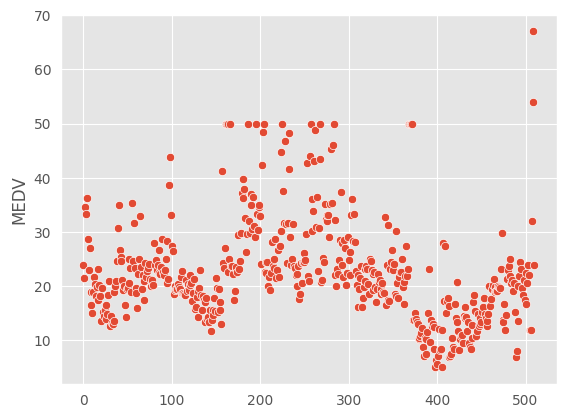

In [ ]:
sns.scatterplot(data=df['MEDV'])

<Axes: xlabel='MEDV', ylabel='Count'>

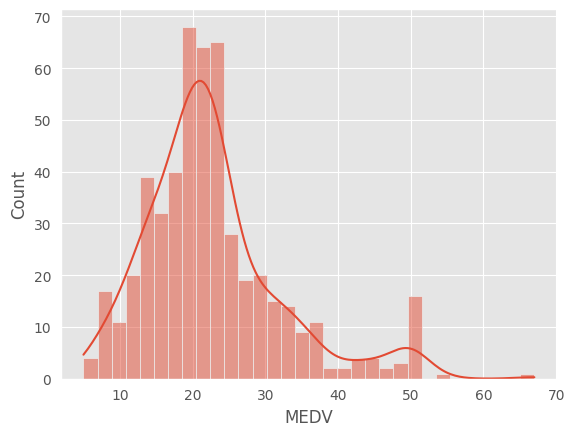

In [ ]:
sns.histplot(data=df['MEDV'],kde=True,palette="YlGnBu")

- insight: MEDV is more distributed between 10.000 and 30.000  $

### Feature Distrubtion

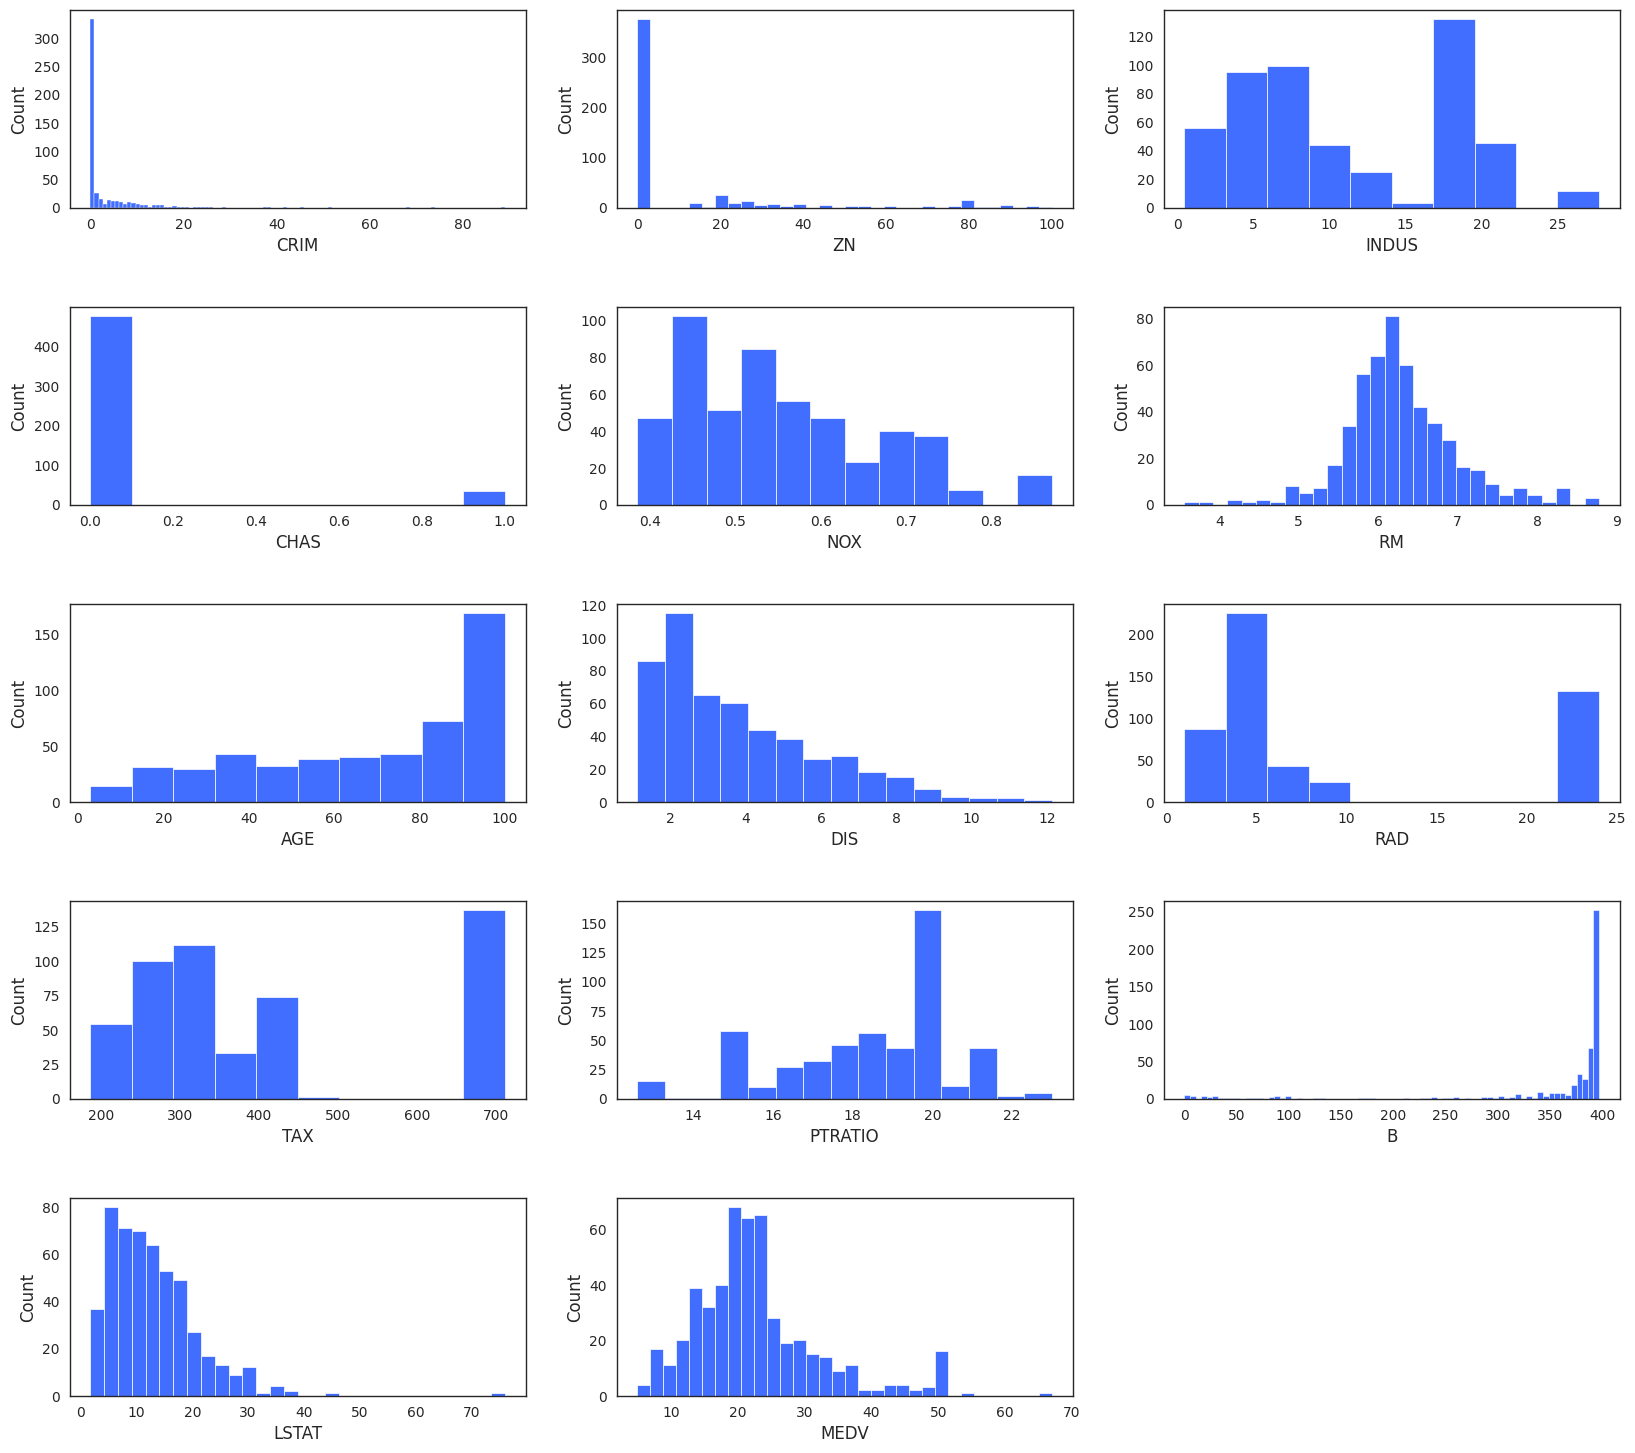

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(5,3,i)
    sns.histplot(data=df, x=name,palette="pastel")
    i = i + 1

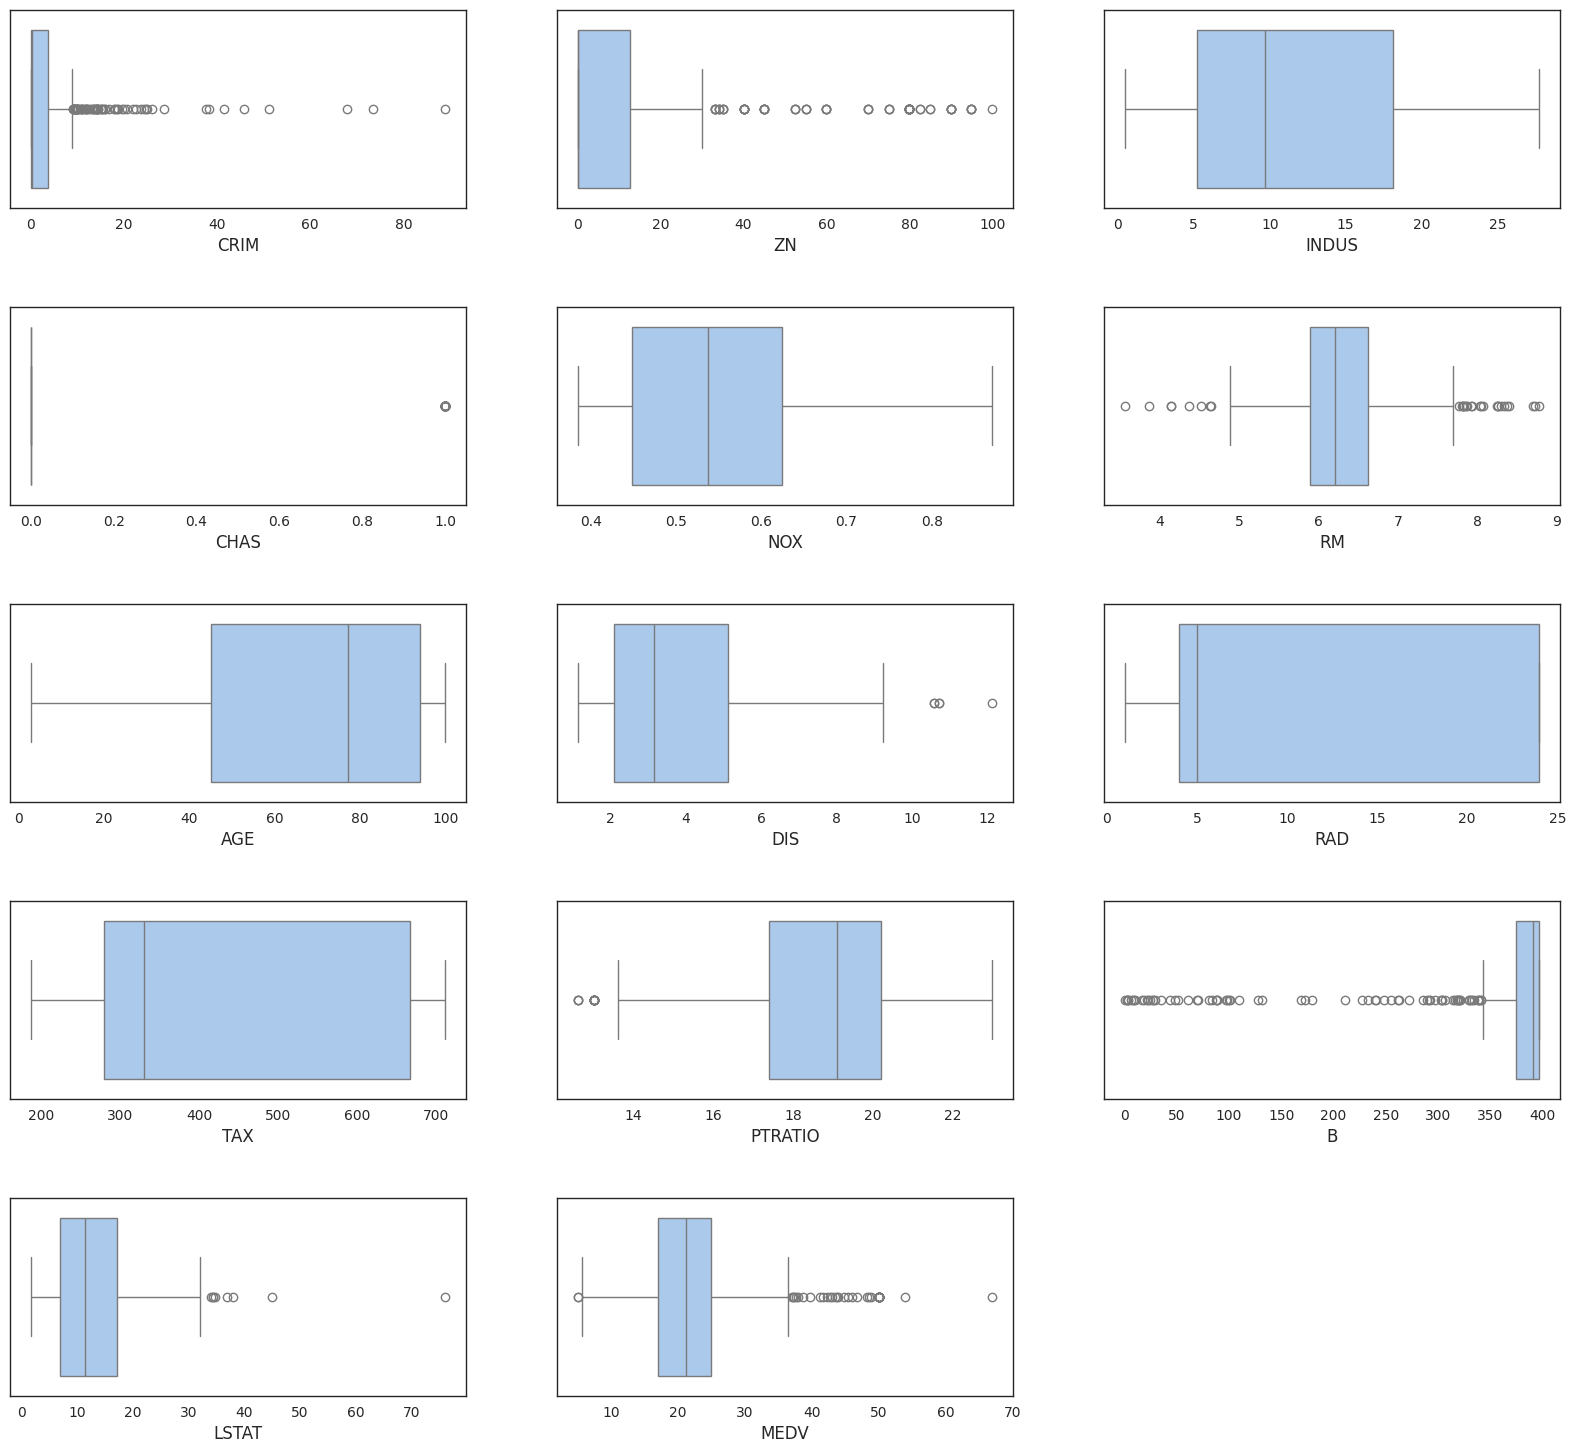

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(5,3,i)
    sns.boxplot(data=df, x=name,palette="pastel")
    i = i + 1

**Summary Inights** :
- The Average of Per capita crime rate by town is Low
- The Average of Proportion of residential land zoned for large lots is Low
- The Average of Proportion of Non-Retail Business Acres is 11.15 %
- The percentage of tract bounds the Charles River is high

# Bi-variate Analysis

### Each Features vs Target Feature

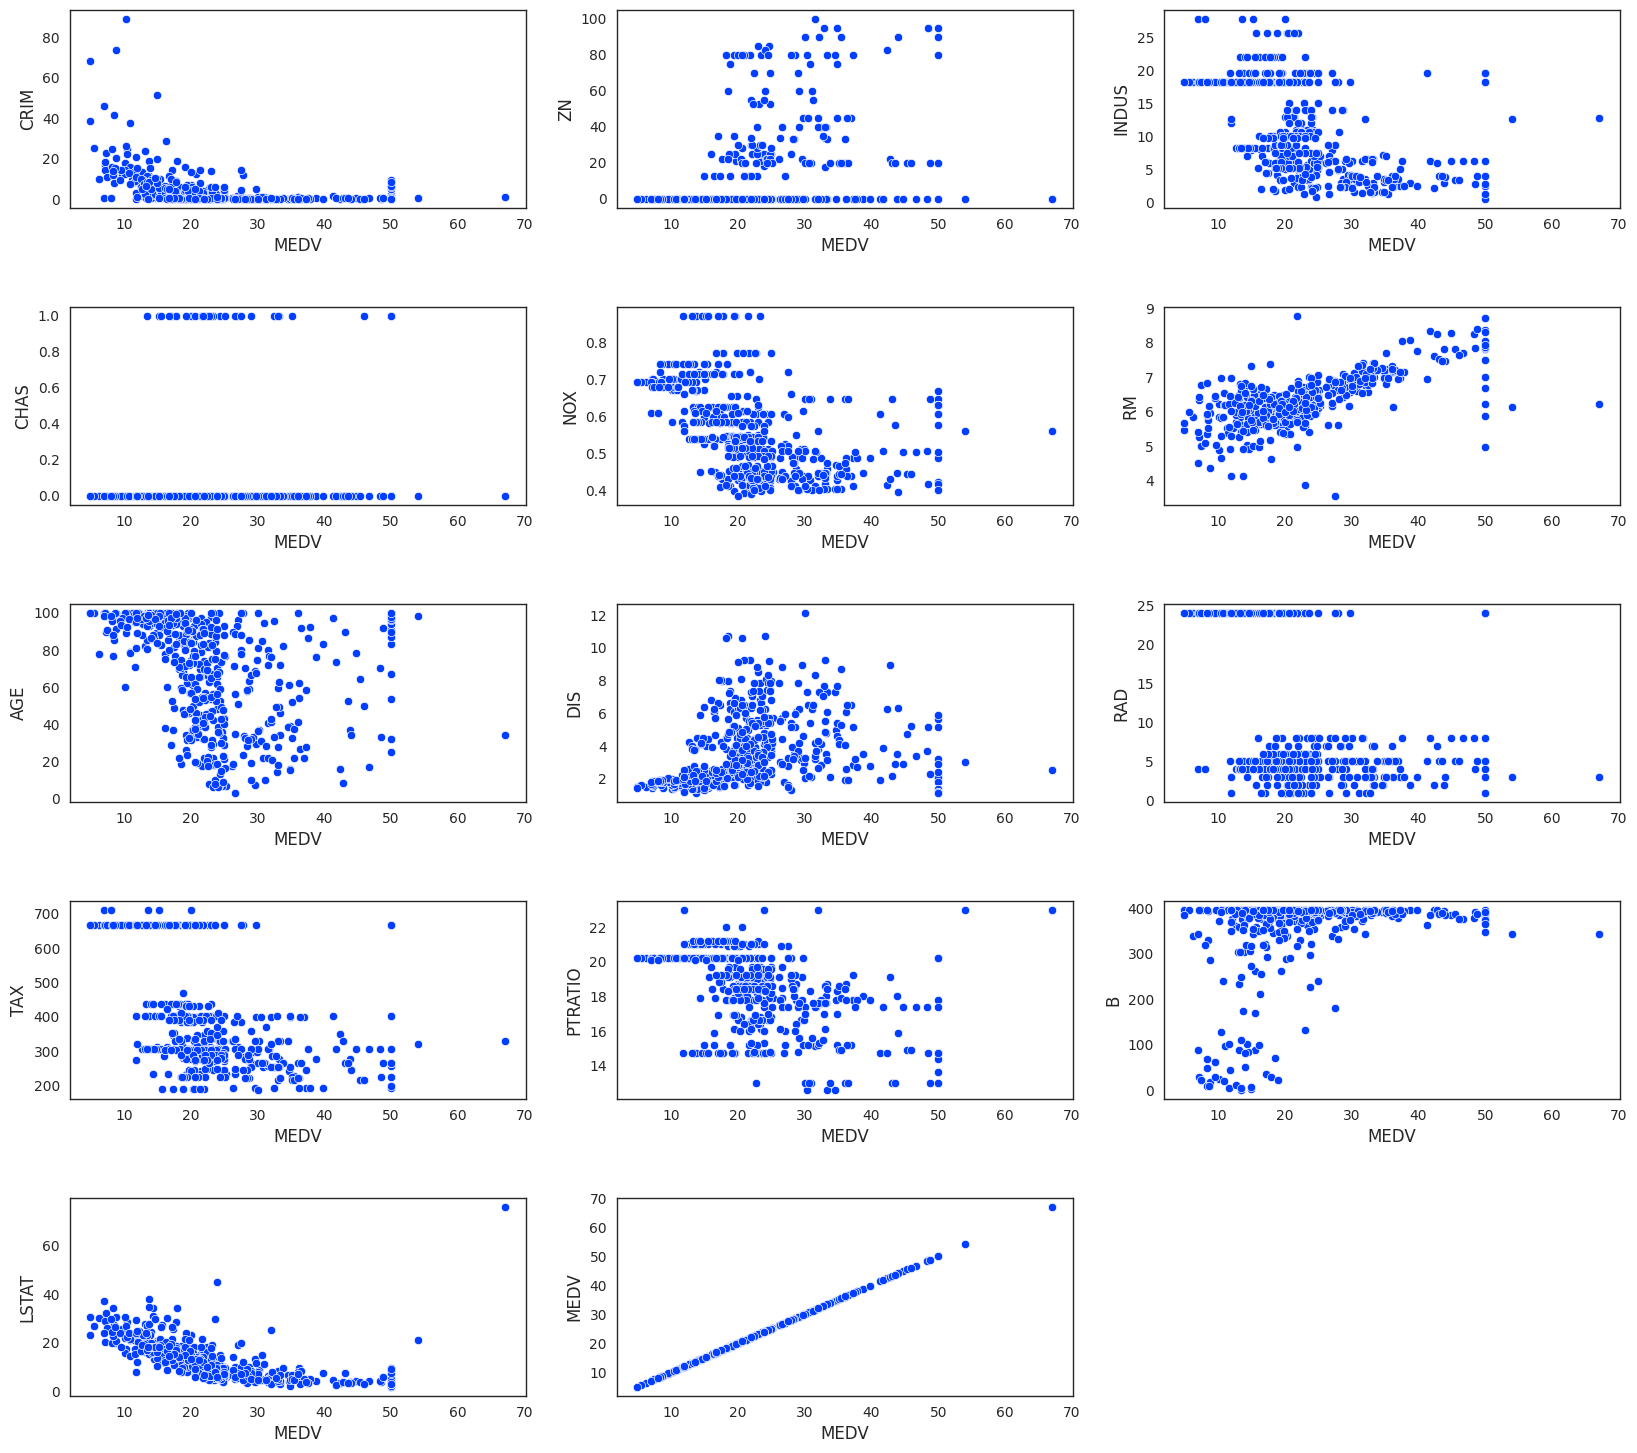

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(5,3,i)
    sns.scatterplot(data=df, x='MEDV',y=name,palette="pastel")
    i = i + 1

### Relation between any two feature

<Figure size 2000x1500 with 0 Axes>

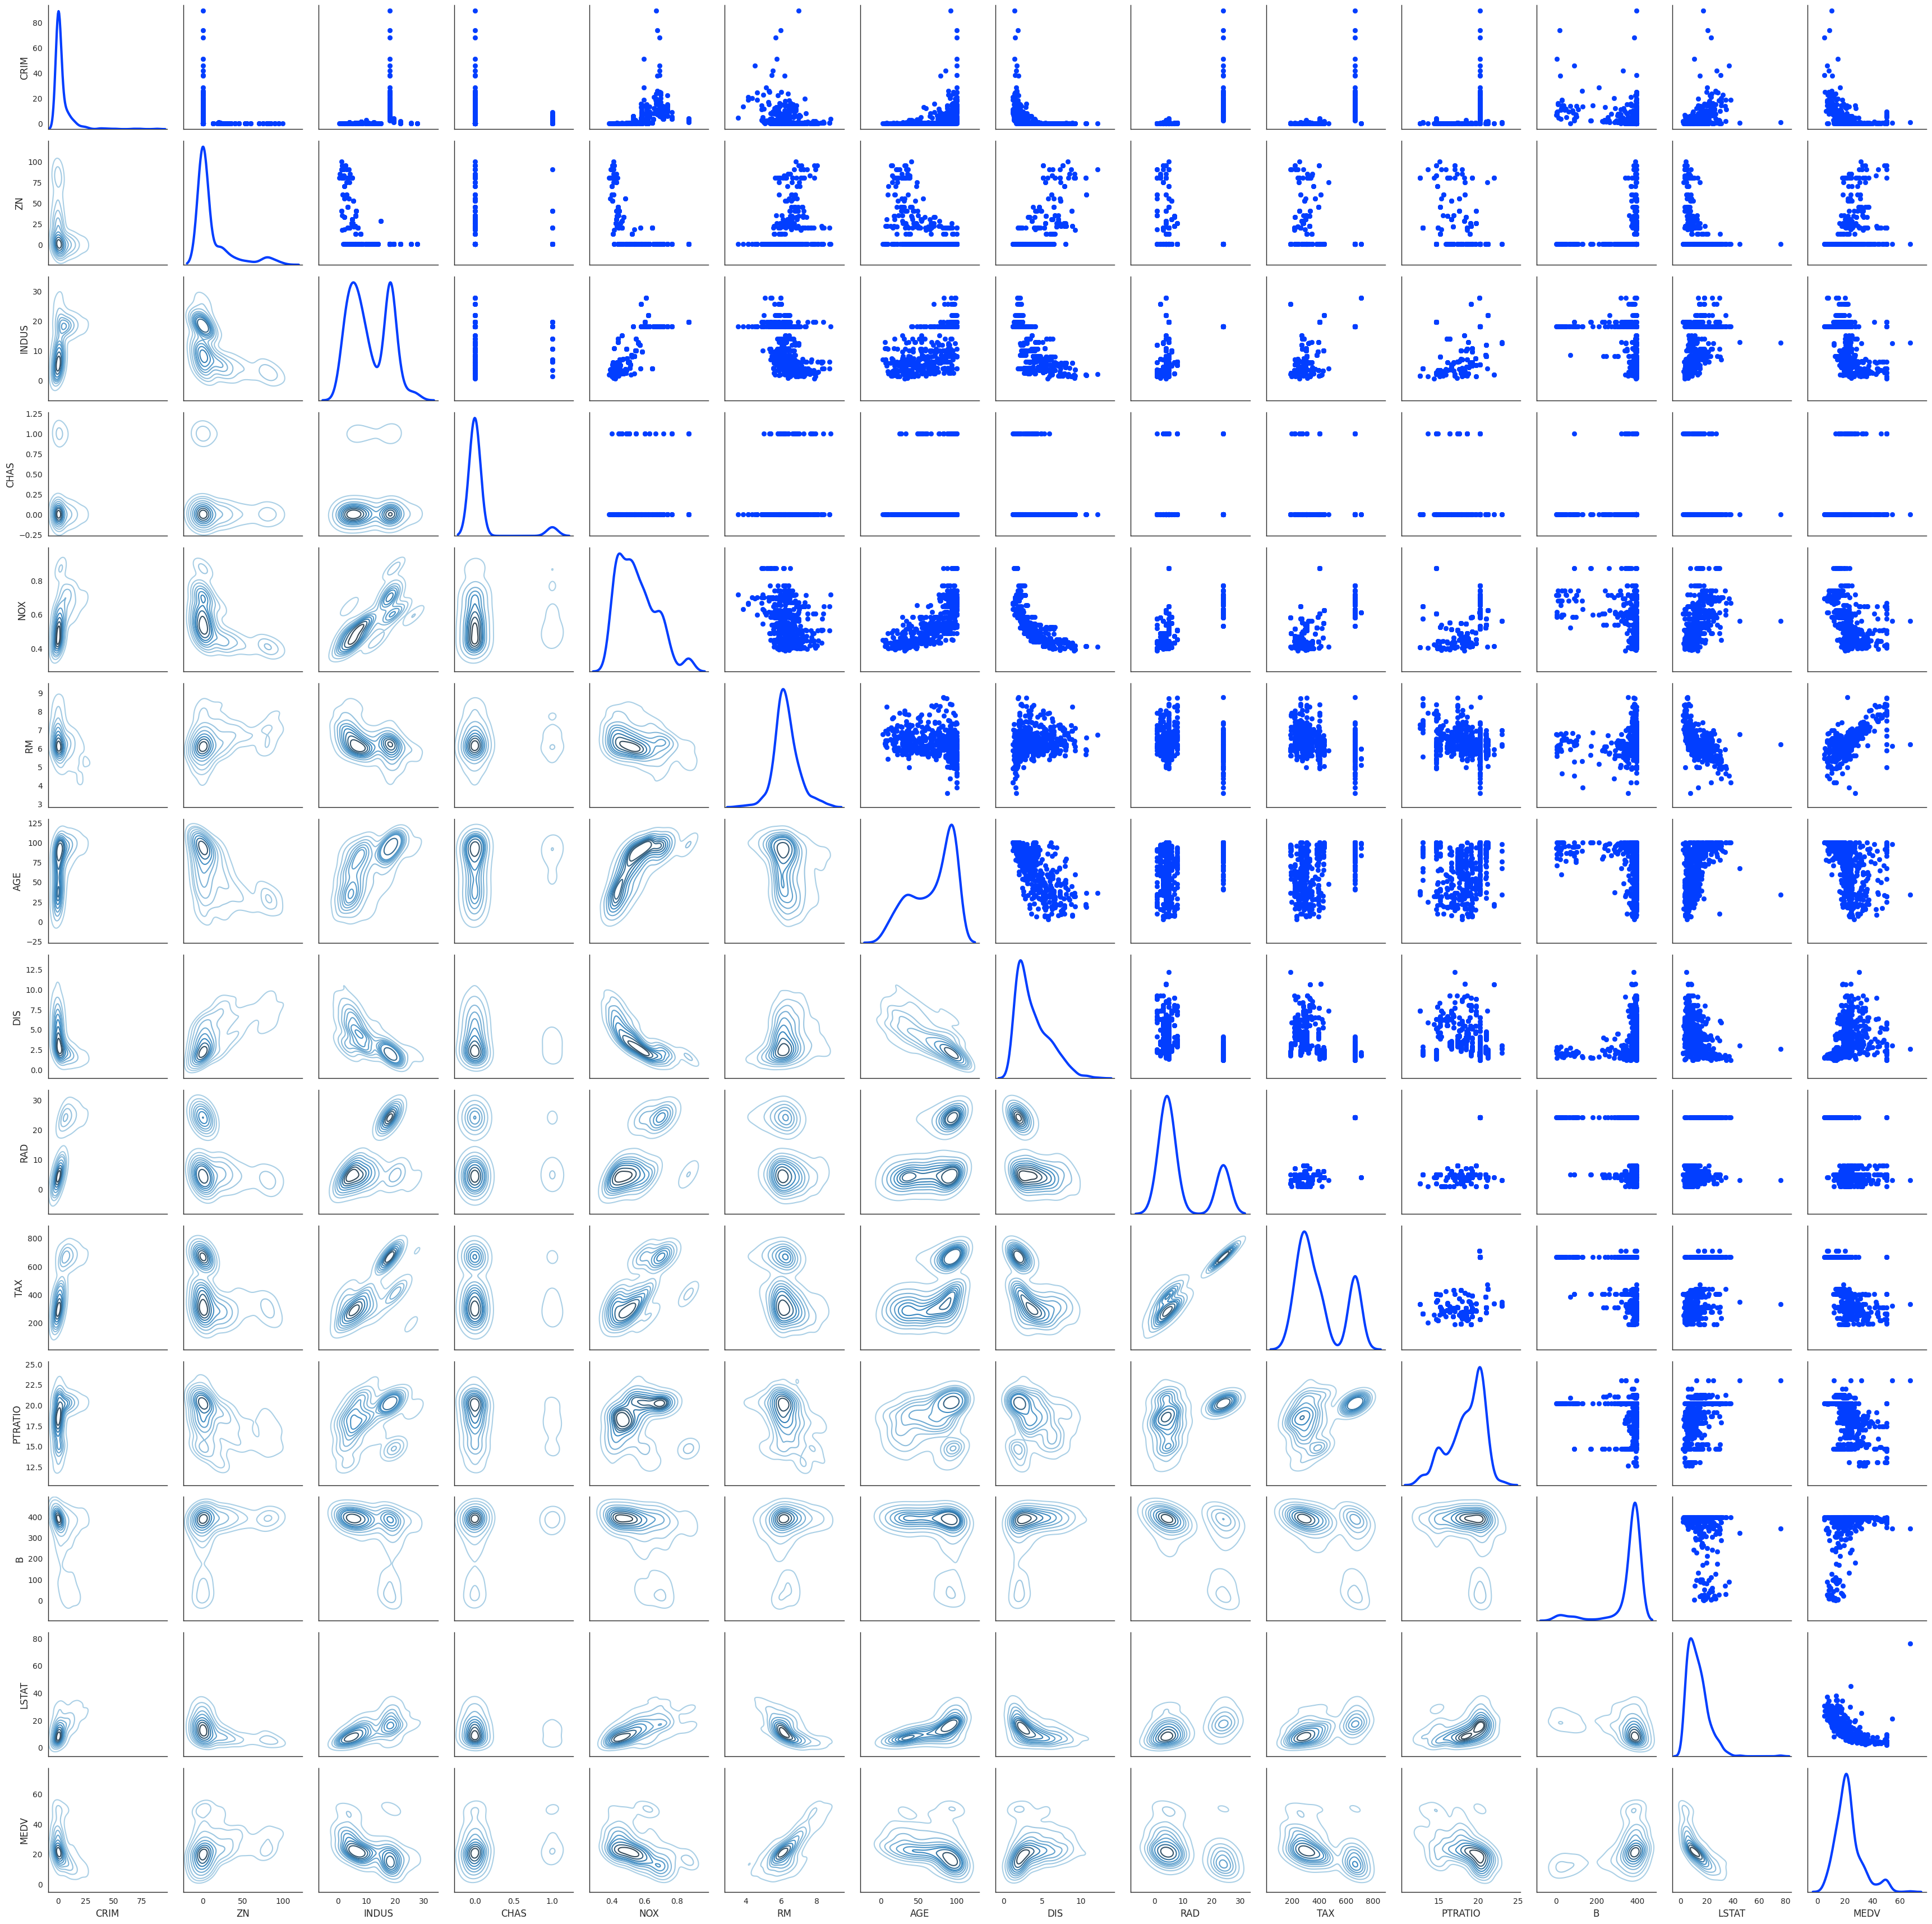

In [ ]:
plt.figure(figsize=(20,15))
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# Multivariate Analysis

### correlation between each features

<Axes: >

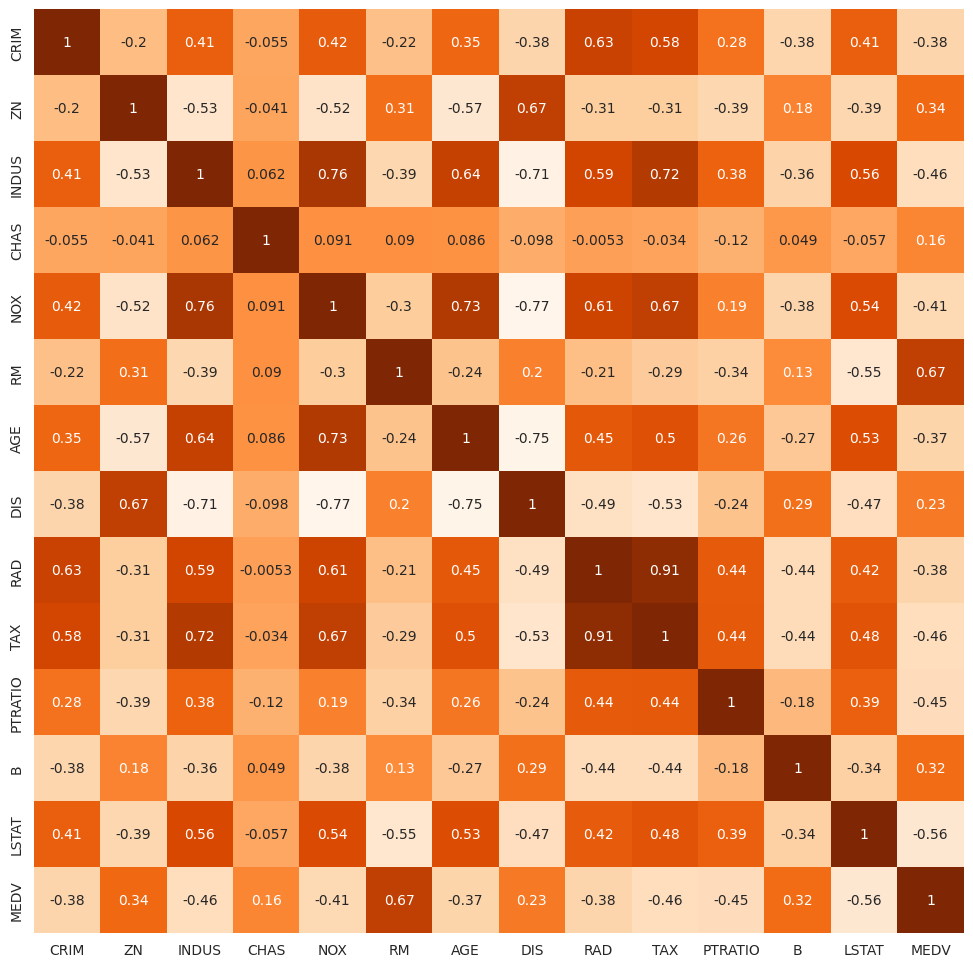

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='Oranges',cbar=False)

# Data Preprocessing

### Split data to train and validation

In [ ]:
y = df['MEDV']
x = df.drop('MEDV',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Scaling by StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### handling outliers by using winsorize


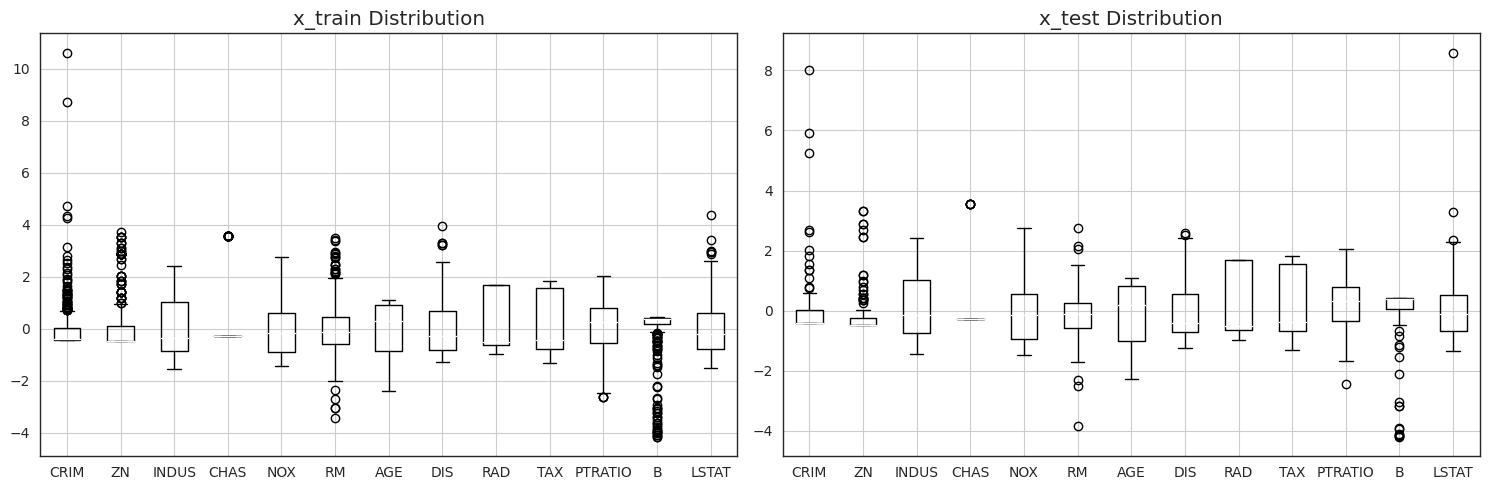

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

X_train.boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')
X_test.boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

for column_name in x_train.columns:

  X_train[column_name] = winsorize(X_train[column_name], limits=[0.05, 0.05])
  X_train[column_name] = np.tanh(X_train[column_name])
  X_test[column_name] = winsorize(X_test[column_name], limits=[0.05, 0.05])
  X_test[column_name] = np.tanh(X_test[column_name])

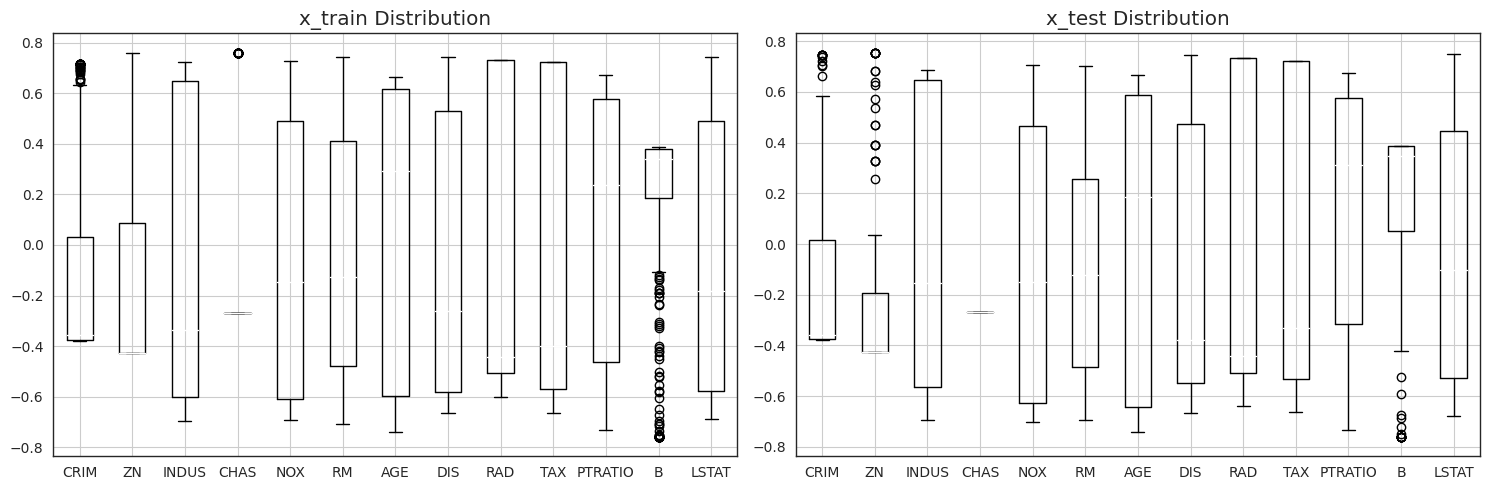

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

X_train.boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')
X_test.boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

# **comparing different models**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def compare_regression_models(models, X_train, y_train, X_test, y_test):
    """
    Compare different regression models.

    Parameters:
    - models: A dictionary containing model names as keys and model objects as values.
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.

    Returns:
    - Dictionary containing model names as keys and mean squared error on the test set as values.
    """
    results = {}

    for model_name, model in models.items():
        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model using mean squared error
        mse = mean_squared_error(y_test, y_pred)

        # Store the results
        results[model_name] = mse

        # Print the results
        print(f"{model_name} - Mean Squared Error: {mse}")

    return results

models = {
    'Linear Regression': LinearRegression(),
    'RandomForest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBRegressor': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear', C=1.0),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Compare models
results = compare_regression_models(models, X_train, y_train, X_test, y_test)

# Print the model with the lowest mean squared error
best_model = min(results, key=results.get)
print(f"\nBest Model: {best_model} - Mean Squared Error: {results[best_model]}")


Linear Regression - Mean Squared Error: 48.32305858440428
RandomForest Regression - Mean Squared Error: 36.56453348543692
BaggingRegressor - Mean Squared Error: 38.22798227184468
XGBRegressor - Mean Squared Error: 40.3487890828746
SVR - Mean Squared Error: 46.56029636444422
Gradient Boosting Regression - Mean Squared Error: 35.32322432927617

Best Model: Gradient Boosting Regression - Mean Squared Error: 35.32322432927617


### Hyperparameter tuning for RandomForestRegressor by Optuna

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    random_state = trial.suggest_int('random_state', 1, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and train the Random Forest model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate accuracy
    accuracy = mean_squared_error(y_test, y_pred)

    return accuracy

# Set up the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=best_params['random_state']
)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = mean_squared_error(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

[I 2024-02-18 22:34:02,954] A new study created in memory with name: no-name-e5f01c7f-71e9-4079-9f19-3168cf32d4a0
[I 2024-02-18 22:34:03,496] Trial 0 finished with value: 34.37380476633208 and parameters: {'n_estimators': 157, 'random_state': 19, 'max_depth': 29, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 34.37380476633208.
[I 2024-02-18 22:34:03,986] Trial 1 finished with value: 37.95125461017446 and parameters: {'n_estimators': 174, 'random_state': 61, 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 34.37380476633208.
[I 2024-02-18 22:34:04,467] Trial 2 finished with value: 37.56778531863616 and parameters: {'n_estimators': 169, 'random_state': 155, 'max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 34.37380476633208.
[I 2024-02-18 22:34:05,084] Trial 3 finished with value: 37.6715071763404 a

Best Hyperparameters: {'n_estimators': 88, 'random_state': 161, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Accuracy on Test Set: 33.50988460578793


In [ ]:
rf_model = RandomForestRegressor(
        n_estimators=53,
        max_depth=27,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='log2',
        random_state=74
    )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

25.280819833613865

### Hyperparameter tuning for XGBRegressor by Optuna

In [ ]:
#!pip install --quiet optuna
import optuna
from xgboost import XGBRegressor

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 0, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'random_state': trial.suggest_int('random_state', 0, 200),
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters and corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Use the best model for predictions
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = mean_squared_error(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

[I 2024-02-18 22:34:18,545] A new study created in memory with name: no-name-7261cf57-b908-4d77-a3d3-4b946e3d9df7
[I 2024-02-18 22:34:19,347] Trial 0 finished with value: 29.852583182175966 and parameters: {'n_estimators': 146, 'max_depth': 8, 'learning_rate': 0.09411545232646007, 'subsample': 0.5699049315664682, 'colsample_bytree': 0.833696810801324, 'random_state': 195}. Best is trial 0 with value: 29.852583182175966.
[I 2024-02-18 22:34:19,808] Trial 1 finished with value: 38.544731683145216 and parameters: {'n_estimators': 194, 'max_depth': 10, 'learning_rate': 0.011405016264591053, 'subsample': 0.11443197829704739, 'colsample_bytree': 0.7991836391750584, 'random_state': 196}. Best is trial 0 with value: 29.852583182175966.
[I 2024-02-18 22:34:20,662] Trial 2 finished with value: 38.1624002479472 and parameters: {'n_estimators': 119, 'max_depth': 9, 'learning_rate': 0.015601224782646316, 'subsample': 0.9092165127729428, 'colsample_bytree': 0.7545254910784692, 'random_state': 20}. B

Best Hyperparameters: {'n_estimators': 147, 'max_depth': 10, 'learning_rate': 0.05759605198736593, 'subsample': 0.6043390249077203, 'colsample_bytree': 0.6366554807985435, 'random_state': 61}
Best Accuracy: 29.601351259111883
Test Set Accuracy: 29.601351259111883


In [ ]:
xgb_model = XGBRegressor(
    n_estimators=121 ,
    max_depth=5 ,
    learning_rate=0.08893388011125987 ,
    subsample= 0.4464397916454239,
    colsample_bytree=0.7193975102657935,
    random_state= 138
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

24.145870031162346

### Hyperparameter tuning for ExtraTreesRegressor by Optuna

In [ ]:
# !pip install --quiet optuna
# import optuna

def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': trial.suggest_int('random_state', 0, 200),

    }

    # Create ExtraTreesRegressor with the suggested hyperparameters
    model = ExtraTreesRegressor(**params)

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate mean squared error on the testing set
    mse = mean_squared_error(y_test, y_pred)

    # Return the mean squared error as the objective value
    return mse

# Set up Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters and their corresponding score
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

# Retrieve the best model using the best hyperparameters
best_model = ExtraTreesRegressor(**best_params)
best_model.fit(X_train, y_train)

[I 2024-02-18 22:34:28,721] A new study created in memory with name: no-name-08f28036-726b-4270-aee7-60b0a8384ec2
[I 2024-02-18 22:34:29,254] Trial 0 finished with value: 41.565475142381224 and parameters: {'n_estimators': 264, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'random_state': 53}. Best is trial 0 with value: 41.565475142381224.
[I 2024-02-18 22:34:29,560] Trial 1 finished with value: 35.82838756103746 and parameters: {'n_estimators': 154, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 28}. Best is trial 1 with value: 35.82838756103746.
[I 2024-02-18 22:34:30,118] Trial 2 finished with value: 43.903182218004794 and parameters: {'n_estimators': 317, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'random_state': 188}. Best is trial 1 with value: 35.82838756103746.
[I 2024-02-18 22:34:31,000] Trial 3 finished with value: 40.9291548021433 a

Best Hyperparameters: {'n_estimators': 79, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 139}
Best Mean Squared Error: 33.02361625658466


ExtraTreesRegressor(max_depth=19, max_features='sqrt', min_samples_leaf=2,
                    min_samples_split=8, n_estimators=79, random_state=139)

In [ ]:
EX_model = ExtraTreesRegressor(
        n_estimators=103,
        max_depth = 17,
        min_samples_leaf=1,
        min_samples_split=2 ,
        max_features='sqrt',
        random_state=104
    )
EX_model.fit(X_train, y_train)
y_pred = EX_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse, np.sqrt(mse)

(26.629668724659055, 5.160394241204741)

# Ensemple Model

In [ ]:
# Create a Voting Regressor
voting_model = VotingRegressor(estimators=[('rf', rf_model), ('xgb', xgb_model), ('EX', EX_model),])

# Train the models
rf_model.fit(X_train, y_train.ravel())
EX_model.fit(X_train, y_train.ravel())
xgb_model.fit(X_train, y_train.ravel())
voting_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_EX = EX_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_voting = voting_model.predict(X_test)

# Evaluate the models using mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_EX = mean_squared_error(y_test, y_pred_EX)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"Extra Trees MSE: {mse_EX}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"Voting Regressor MSE: {mse_voting}")

Random Forest MSE: 25.280819833613865
Extra Trees MSE: 26.629668724659055
XGBoost MSE: 24.145870031162346
Voting Regressor MSE: 24.773828223100743


# Save Model

In [ ]:
import joblib

# Save the model
joblib.dump(voting_model, 'voting_model.joblib')

['voting_model.joblib']